<a href="https://colab.research.google.com/github/uma-27/IRIS-FLOWER-CLASSIFICATION-OIBSIP/blob/main/TASK_3_email_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


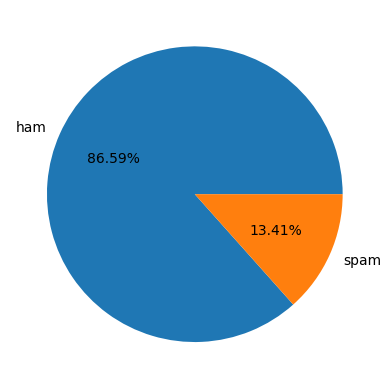

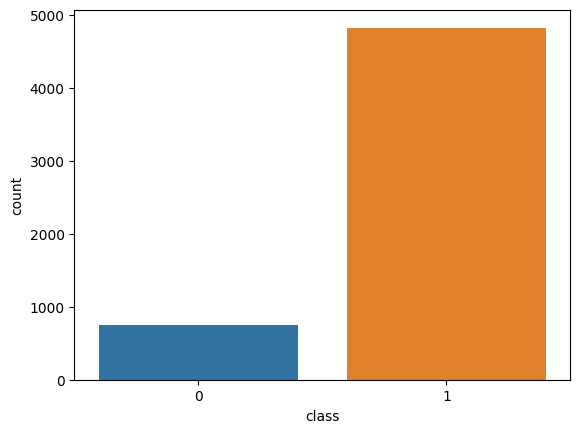

Accuracy: 0.9694862014808167


array([[ 463,  134],
       [   2, 3858]])

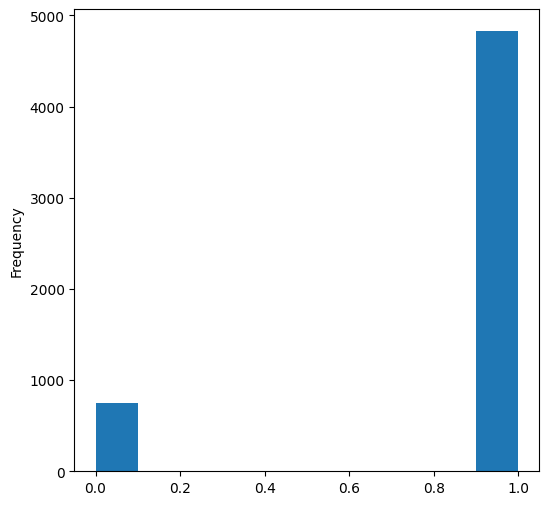

In [2]:
#!/usr/bin/env python
# coding: utf-8

# # Submission by : G.Gowthami Reddy

# # EMAIL SPAM DETECTION WITH MACHINE LEARNING

# # Task-3

# # Importing required libraries

# In[77]:


import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib import colors 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# In[78]:


data=pd.read_csv("/content/spam.csv",encoding="ISO-8859-1")


# In[79]:


#printing head of the data
data.head(10)


# In[80]:


#printing tail of the data
data.tail(10)


# In[81]:


#shape of the data
data.shape


# In[82]:


data.columns


# In[83]:


data.info()


# In[84]:


#knowing the data description
data.describe()


# In[85]:


data['v1'].value_counts()


# In[86]:


data['v2'].value_counts()


# In[87]:


data.isnull().sum()


# In[88]:


#dropping unwanted columns
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)


# In[89]:


data.columns


# In[90]:


#renaming the columns
data.rename(columns={'v1':'class','v2':'mail'},inplace=True)


# In[91]:


data.columns


# # LABEL ENCODING

# In[92]:


# spam=0 and ham=1
data.loc[data['class']=='spam','class',]=0
data.loc[data['class']=='ham','class',]=1


# In[93]:


data.head()


# # DATA VISUALIZATION

# In[94]:


l=['ham','spam']
s=data['class'].value_counts()
#pie chart
plt.pie(s,labels=l,autopct='%1.2f%%')
plt.show()


# In[95]:


sns.countplot(x='class', data=data )
plt.show()


# In[96]:


data['class'].plot(bins=10,kind='hist',figsize=(6,6))


# # Data Spliting into train and test

# In[98]:


X_train, X_test, y_train, y_test = train_test_split(data['mail'], data['class'], test_size=0.2, random_state=42)


# # FEATURE EXTRACTION

# In[99]:


f=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
Xtrain_f=f.fit_transform(X_train)
Xtest_f=f.fit_transform(X_test)


# In[100]:


#converting values to integers
y_train=y_train.astype('int')
y_train=y_train.astype('int')


# # MODEL BUILDING AND EVALUATION

# In[101]:


model=LogisticRegression()
model.fit(Xtrain_f,y_train)
pred_train=model.predict(Xtrain_f)
accuracy = accuracy_score(y_train,pred_train)
print("Accuracy:", accuracy)
cnf=metrics.confusion_matrix(y_train,pred_train)
cnf